<a href="https://colab.research.google.com/github/ashishpatel26/tcn-keras-Examples/blob/master/TCN_TimeSeries_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Library

In [1]:
!pip install wget
!pip install keras-tcn
import wget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tqdm.notebook import tqdm

from tcn import TCN

In [2]:
wget.download("https://github.com/philipperemy/keras-tcn/raw/master/tasks/monthly-milk-production-pounds-p.csv")

100% [............................................................] 2384 / 2384

'monthly-milk-production-pounds-p (2).csv'

### Read the dataset

In [3]:
milk = pd.read_csv('monthly-milk-production-pounds-p.csv', index_col=0, parse_dates=True)

### Display top5 Record

In [4]:
print(milk.shape)
milk.head()

(168, 1)


,milk_production_pounds
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


### Lookback 12 month windows

In [5]:
lookback_window = 12 

### Convert Milk Data into Numpy Array

In [6]:
milk = milk.values  

### Convert in to X, y format

In [7]:
x = []
y = []
for i in tqdm(range(lookback_window, len(milk))):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])

  0%|          | 0/156 [00:00<?, ?it/s]

### Generate Array of list x and y

In [8]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(156, 12, 1)
(156, 1)


### Model Design

In [9]:
i = Input(shape=(lookback_window, 1))
m = TCN()(i)
m = Dense(1, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])
model.summary()

2022-09-21 17:16:36.060897: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-21 17:16:36.061058: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 1)]           0         
                                                                 
 tcn (TCN)                   (None, 64)                136256    
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 136,321
Trainable params: 136,321
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile('adam','mae')

### Time for Model training...

In [11]:
print('Train...')
model.fit(x, y, epochs=100)

Train...
Epoch 1/100


2022-09-21 17:16:49.498688: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-21 17:16:50.209936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 2s 86ms/step - loss: 2676.5107
Epoch 2/100
5/5 [==============================] - 0s 52ms/step - loss: 710.7729
Epoch 3/100
5/5 [==============================] - 0s 49ms/step - loss: 206.8340
Epoch 4/100
5/5 [==============================] - 0s 48ms/step - loss: 293.9011
Epoch 5/100
5/5 [==============================] - 0s 50ms/step - loss: 187.4748
Epoch 6/100
5/5 [==============================] - 0s 49ms/step - loss: 196.2617
Epoch 7/100
5/5 [==============================] - 0s 48ms/step - loss: 185.1290
Epoch 8/100
5/5 [==============================] - 0s 49ms/step - loss: 155.9228
Epoch 9/100
5/5 [==============================] - 0s 48ms/step - loss: 157.9975
Epoch 10/100
5/5 [==============================] - 0s 49ms/step - loss: 163.7247
Epoch 11/100
5/5 [==============================] - 0s 51ms/step - loss: 153.1682
Epoch 12/100
5/5 [==============================] - 0s 52ms/step - loss: 126.7464
Epoch 13/100
5/5 [==================

### Prediction with TCN Model

In [12]:
predict = model.predict(x)

2022-09-21 17:17:16.443833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


### Plot the Result

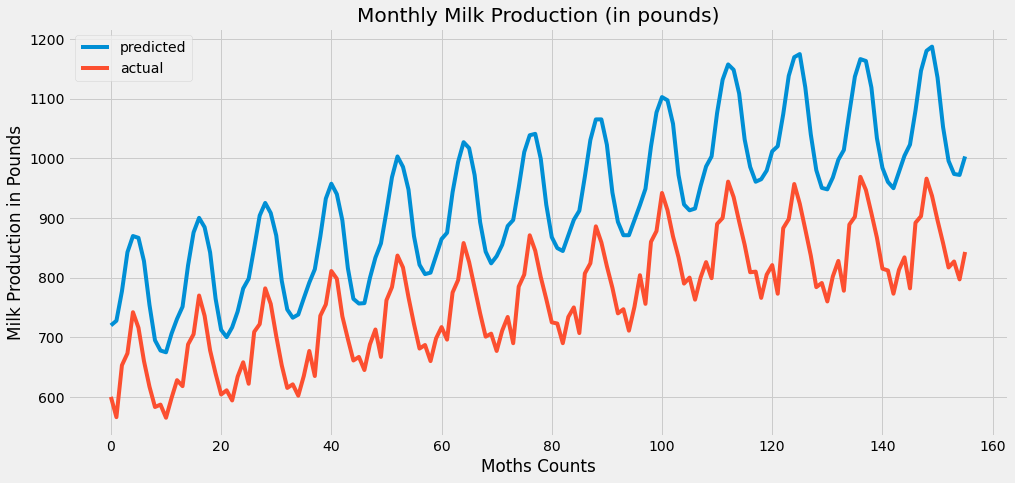

In [13]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,7))
plt.plot(predict)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.xlabel("Moths Counts")
plt.ylabel("Milk Production in Pounds")
plt.show()